In [2]:
import sys 
sys.path.insert(1, "../")
from workloads.util import use_plots

import seaborn as sns 
from matplotlib import pyplot as plt
sns.set()

import pandas as pd
%load_ext autoreload
%autoreload 2

In [3]:
policy_map = {
    'total_error': 'Regret-Proportional',
    'total_error_cold': 'Regret-Proportional',
    'min_past': 'Minimum-Past', 
    'round_robin': "Round-Robin", 
    'max_pending': "Maximum-Pending", 
    'last_query': "Read-Optimized", 
    "query_proportional": "Query-Proportional",
    "batch": "Batched", 
    'random': "Random"
}
hue_order = ['Regret-Proportional', "Query-Proportional", 'Minimum-Past', "Maximum-Pending", "Round-Robin", "Random", "Batched", "Best-Case"]

In [4]:
def hex_to_rgb(hex):
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal/256)
  
  return tuple(rgb)


colors = sns.color_palette(as_cmap=True)
#colors_hex = ["d0e2ff", "4589ff", "a8a8a8", "8d8d8d", "6f6f6f", "525252", "393939"]
colors_hex = ["24a148", "ff832b", "002d9c", "0f62fe", "78a9ff", "a6c8ff", "d0e2ff", "8d8d8d"]
colors = [hex_to_rgb(c) for c in colors_hex]
hue_colors = {hue_order[i]: colors[i] for i in range(len(hue_order))}
hue_colors

{'Regret-Proportional': (0.140625, 0.62890625, 0.28125),
 'Query-Proportional': (0.99609375, 0.51171875, 0.16796875),
 'Minimum-Past': (0.0, 0.17578125, 0.609375),
 'Maximum-Pending': (0.05859375, 0.3828125, 0.9921875),
 'Round-Robin': (0.46875, 0.66015625, 0.99609375),
 'Random': (0.6484375, 0.78125, 0.99609375),
 'Batched': (0.8125, 0.8828125, 0.99609375),
 'Best-Case': (0.55078125, 0.55078125, 0.55078125)}

In [5]:
plots_dir = use_plots("wikipedia", download=False)
#wiki_df = pd.read_csv(f"{plots_dir}/results.csv")
wiki_df = pd.read_csv(f"{plots_dir}/results_10000.csv")
wiki_df = wiki_df[wiki_df["policy"] != "total_error_cold"]
wiki_df["error"] = 1-wiki_df["top1_error"]
wiki_df["workload"] = "Information Retrieval"
wiki_df.policy = wiki_df.policy.map(policy_map)

wiki_baseline_df = pd.read_csv(f"{plots_dir}/baseline_10000.csv")
wiki_upper_bound = 1-wiki_baseline_df[wiki_baseline_df["policy"] == "upper_bound"].top1_error.iloc[0]
wiki_upper_bound_updates = wiki_baseline_df[wiki_baseline_df["policy"] == "upper_bound"].total_updates.iloc[0]
wiki_lower_bound = 1-wiki_baseline_df[wiki_baseline_df["policy"] == "lower_bound"].top1_error.iloc[0]
wiki_lower_bound_updates = wiki_baseline_df[wiki_baseline_df["policy"] == "lower_bound"].total_updates.iloc[0]

wiki_df["error_increase"] = wiki_df["error"] - wiki_upper_bound


# wiki total_error_cold 1000 
# {'top1': 0.3500821299204383, 'top5': 0.7011969031401987, 'top10': 0.8100792406593936
# {'top1': 0.3500821299204383, 'top5': 0.7011969031401987, 'top10': 0.8100792406593936,


# minimum past 0.1 
# {'top1': 0.06932621362340087, 'top5': 0.13146137753546033, 'top10': 0.15400831465122874, 'doc_size': 10.0}
# total errror cold 0.1 
#  {'top1': 0.061830186357337384, 'top5': 0.12147202499745852, 'top10': 0.1407230643288621, 'doc_size': 10.0}

print(wiki_upper_bound, wiki_lower_bound)

wiki_baseline_df

{'results_dir': '/Users/sarahwooders/repos/experiments/data/results', 'dataset_dir': '/Users/sarahwooders/repos/experiments/data/datasets', 'plots_dir': '/Users/sarahwooders/repos/experiments/data/plots', 'aws_dir': 'vldb', 'credentials': '/Users/sarahwooders/repos/experiments/ralf-vldb.json'}
0.7756766642282371 0.9421726408193124


,Unnamed: 0,policy,top1_error,top5_error,total_updates
0,0,upper_bound,0.224323,0.458413,4754
1,1,lower_bound,0.057827,0.091661,4754


In [6]:
plots_dir = use_plots("yahoo_a1", download=False)
stl_df = pd.read_csv(f"{plots_dir}/results.csv")
stl_updates_df = pd.read_csv(f"{plots_dir}/updates.csv")
stl_df["error"] = stl_df["total_error"] 
stl_df["updates"] = stl_df["runtime"].apply(lambda r: int(24/r) if r > 0 else "infinity")
stl_updates_df["updates"] = stl_updates_df["runtime"].apply(lambda r: int(24/r) if r > 0 else "infinity")
# add minimum past and max pending as equivalent to round robin
for eq_policy in ["min_past", "max_pending", "query_proportional"]: 
    policy_df = pd.DataFrame(stl_df[stl_df["policy"] == "round_robin"]) 
    policy_df["policy"] = eq_policy
    stl_df = pd.concat([stl_df, policy_df])
stl_df["workload"] = "Anomaly Detection"
stl_df.policy = stl_df.policy.map(policy_map)
stl_updates_df.policy = stl_updates_df.policy.map(policy_map)


stl_baseline_df = pd.read_csv(f"{plots_dir}/baseline.csv")
stl_upper_bound = stl_baseline_df[stl_baseline_df["policy"] == "All"].total_error.iloc[0]
stl_upper_bound_updates = stl_baseline_df[stl_baseline_df["policy"] == "All"].total_updates.iloc[0]
stl_lower_bound = stl_baseline_df[stl_baseline_df["policy"] == "None"].total_error.iloc[0]
stl_lower_bound_updates = stl_baseline_df[stl_baseline_df["policy"] == "None"].total_updates.iloc[0]

stl_df["error_increase"] = stl_df["error"] - stl_upper_bound

stl_baseline_df

{'results_dir': '/Users/sarahwooders/repos/experiments/data/results', 'dataset_dir': '/Users/sarahwooders/repos/experiments/data/datasets', 'plots_dir': '/Users/sarahwooders/repos/experiments/data/plots', 'aws_dir': 'vldb', 'credentials': '/Users/sarahwooders/repos/experiments/ralf-vldb.json'}


,Unnamed: 0.1,Unnamed: 0,runtime,policy,total_error,average_staleness,total_updates
0,0,0,0,All,90.793787,0.998466,43684
1,0,0,1000000,None,880.302334,325.500000,1


In [7]:
stl_df.policy.value_counts()

Round-Robin            11
Regret-Proportional    11
Batched                11
Random                 11
Minimum-Past           11
Maximum-Pending        11
Query-Proportional     11
Name: policy, dtype: int64

In [8]:
plots_dir = use_plots("ml-1m", download=False)
als_df = pd.read_csv(f"{plots_dir}/results.csv")
als_updates_df = pd.read_csv(f"{plots_dir}/updates.csv")
als_df["workload"] = "Recommendation"
als_df.policy = als_df.policy.map(policy_map)

als_baseline_df = pd.read_csv(f"{plots_dir}/baseline.csv")
als_upper_bound = als_baseline_df[als_baseline_df["updates"] == 10000].error.iloc[0]
als_upper_bound_updates = als_baseline_df[als_baseline_df["updates"] == 10000].total_updates.iloc[0]
als_lower_bound = als_baseline_df[als_baseline_df["updates"] == 0].error.iloc[0]
als_lower_bound_updates = als_baseline_df[als_baseline_df["updates"] == 0].total_updates.iloc[0]

als_df["error_increase"] = als_df["error"] - als_upper_bound

print(als_upper_bound, als_lower_bound)
als_baseline_df

{'results_dir': '/Users/sarahwooders/repos/experiments/data/results', 'dataset_dir': '/Users/sarahwooders/repos/experiments/data/datasets', 'plots_dir': '/Users/sarahwooders/repos/experiments/data/plots', 'aws_dir': 'vldb', 'credentials': '/Users/sarahwooders/repos/experiments/ralf-vldb.json'}
1.1169459005554807 6.294494356144663


,Unnamed: 0,updates,error,total_updates,ts_factor,max_ts
0,0,0,6.294494,0,60,20018
1,1,10000,1.116946,25497,60,20018


In [9]:
results_df = pd.concat([
    wiki_df[["workload", "policy", "error", "total_updates", "updates"]],
    stl_df[["workload", "policy", "error", "total_updates", "updates"]],
    als_df[["workload", "policy", "error", "total_updates", "updates"]]
])
results_df

,workload,policy,error,total_updates,updates
1,Information Retrieval,Round-Robin,0.941478,9,0.001
2,Information Retrieval,Regret-Proportional,0.930212,9,0.001
3,Information Retrieval,Random,0.929371,10,0.001
5,Information Retrieval,Query-Proportional,0.930176,9,0.001
6,Information Retrieval,Minimum-Past,0.938734,10,0.001
...,...,...,...,...,...
53,Recommendation,Batched,3.977835,2387,0.200
54,Recommendation,Batched,1.364884,12068,1.000
55,Recommendation,Batched,1.183887,17940,2.000
56,Recommendation,Batched,1.145403,21290,3.000


In [10]:
sns.set_theme(style="whitegrid")
sns.set_theme(style="whitegrid", font_scale=1.7)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

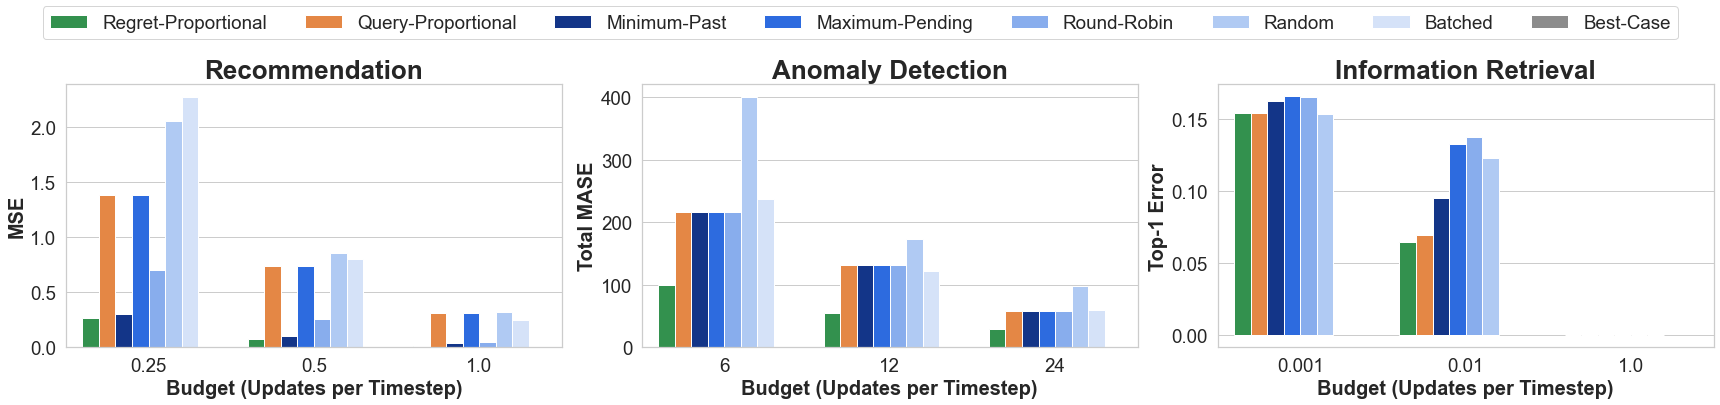

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(24,5))

updates = [0.5, 0.25, 1]
g0 = sns.barplot(data=als_df[als_df.updates.isin(updates)], x="updates", y="error_increase", hue="policy", ax=axes[0], palette=hue_colors, hue_order=hue_order)
axes[0].set(title="Recommendation", xlabel="Budget (Updates per Timestep)",  ylabel="MSE")
axes[0].set_xlabel("Budget (Updates per Timestep)", fontsize=20, fontweight="bold")
axes[0].set_ylabel("MSE", fontsize=20, fontweight="bold")
axes[0].set_title("Recommendation", fontsize=26, fontweight="bold")
g0.legend_.remove()

updates = [6, 12, 24]
g1 = sns.barplot(data=stl_df[stl_df.updates.isin(updates)], x="updates", y="error_increase", hue="policy", ax=axes[1], palette=hue_colors, hue_order=hue_order)
axes[1].set(title="Anomaly Detection", xlabel="Budget (Updates per Timestep)",  ylabel="Total MASE")
axes[1].set_xlabel("Budget (Updates per Timestep)", fontsize=20, fontweight="bold")
axes[1].set_ylabel("Total MASE", fontsize=20, fontweight="bold")
axes[1].set_title("Anomaly Detection", fontsize=26, fontweight="bold")
g1.legend_.remove()

#updates = [0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1]
updates = [0.001, 0.01, 1]
g2 = sns.barplot(data=wiki_df[wiki_df.updates.isin(updates)], x="updates", y="error_increase", hue="policy", ax=axes[2], palette=hue_colors, hue_order=hue_order)
axes[2].set(title="Information Retrieval", xlabel="Budget (Updates per Timestep)",  ylabel="Top-1 Error")
axes[2].set_xlabel("Budget (Updates per Timestep)", fontsize=20, fontweight="bold")
axes[2].set_ylabel("Top-1 Error", fontsize=20, fontweight="bold")
axes[2].set_title("Information Retrieval", fontsize=26, fontweight="bold")
g2.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
fig.tight_layout()
fig.savefig('../data/plots/bar_all.pdf', dpi=300, bbox_inches = "tight")



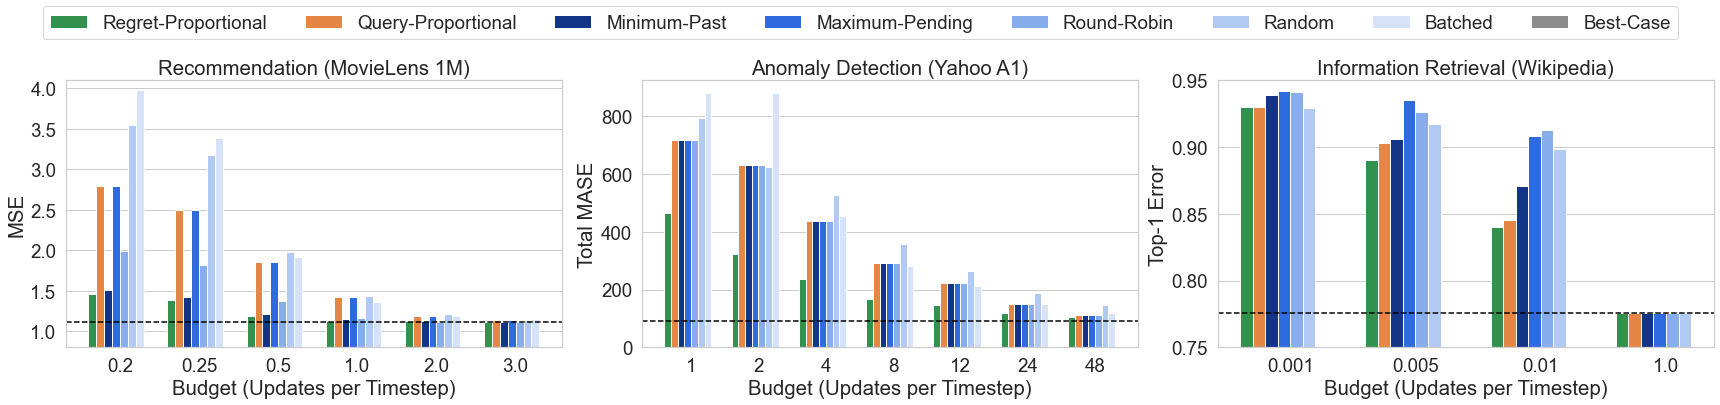

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(24,5))

updates = [0.5, 0.25, 0.2, 1, 2, 3]
g0 = sns.barplot(data=als_df[als_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[0], palette=hue_colors, hue_order=hue_order)
axes[0].set(title="Recommendation (MovieLens 1M)", xlabel="Budget (Updates per Timestep)",  ylabel="MSE", ylim=(0.8, 4.1))
g0.axline((0, als_upper_bound), (0.1, als_upper_bound), color='black', linestyle="--")
g0.legend_.remove()

#updates = [1, 2, 3, 4, 6, 8, 12, 24, 48, 120, 240]
updates = [1, 2, 4, 8, 12, 24, 48]
g1 = sns.barplot(data=stl_df[stl_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[1], palette=hue_colors, hue_order=hue_order)
axes[1].set(title="Anomaly Detection (Yahoo A1)", xlabel="Budget (Updates per Timestep)",  ylabel="Total MASE")
g1.axline((0, stl_upper_bound), (0.1, stl_upper_bound), color='black', linestyle="--")
g1.legend_.remove()

#updates = [0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1]

updates = [0.001, 0.005, 0.01, 1.0]
g2 = sns.barplot(data=wiki_df[wiki_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[2], palette=hue_colors, hue_order=hue_order)
axes[2].set(title="Information Retrieval (Wikipedia)", xlabel="Budget (Updates per Timestep)",  ylabel="Top-1 Error", ylim=(0.75, 0.95))
g2.axline((0, wiki_upper_bound), (0.1, wiki_upper_bound), color='black', linestyle="--")
g2.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
fig.tight_layout()
fig.savefig('../data/plots/bar_all.pdf', dpi=300, bbox_inches = "tight")


# bold the caption 
# make baselines the rightmost 
# powers of two 
# make best baseline red - other ones gray 
# bar plot: low, medium, high (three points for each graph)
# plot error savings (?) 

0.7756766642282371


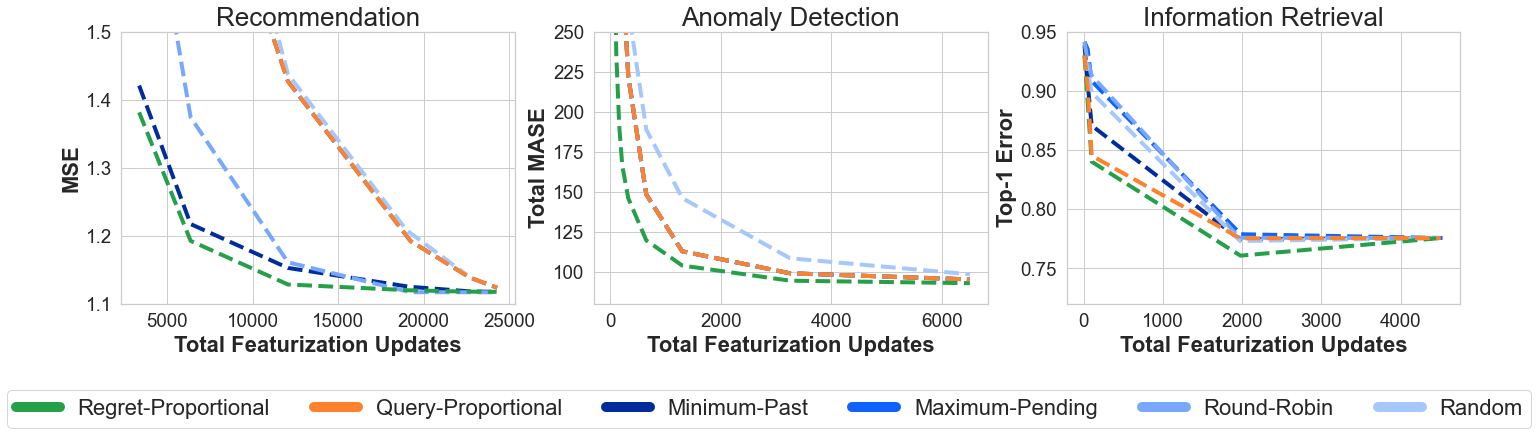

In [173]:
fig, axes = plt.subplots(1, 3, figsize=(24,5))
linewidth = 4


line_hue_order = ['Minimum-Past', "Maximum-Pending", "Round-Robin", "Random", 'Regret-Proportional', "Query-Proportional"]


updates = [0.25, 0.5, 1, 2, 3, 4, 6]
g0 = sns.lineplot(data=als_df[als_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[0], palette=hue_colors, linewidth=linewidth, hue_order=line_hue_order)
axes[0].set(title="Recommendation", xlabel="Total Featurization Updates",  ylabel="MSE", ylim=(1.1, 1.5))
axes[0].set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
axes[0].set_ylabel("MSE", fontsize=22, fontweight="bold")
axes[0].set_title("Recommendation", fontsize=26)
#g0.axline((5000, als_upper_bound), (1, als_upper_bound), color='grey') #, linestyle="--")
#g0.axline((5000, als_lower_bound), (1, als_lower_bound), color='black', linestyle="--")
g0.legend_.remove()

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48, 120, 240]
g1 = sns.lineplot(data=stl_df[stl_df.updates.isin(updates)].reset_index(), x="total_updates", y="error", hue="policy", ax=axes[1], palette=hue_colors, linewidth=linewidth, hue_order=line_hue_order)
axes[1].set(title="Anomaly Detection", xlabel="Total Featurization Updates",  ylabel="Total MASE", ylim=(80, 250))
axes[1].set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
axes[1].set_ylabel("Total MASE", fontsize=22, fontweight="bold")
axes[1].set_title("Anomaly Detection", fontsize=26)
#g1.axline((0, stl_upper_bound), (0.1, stl_upper_bound), color='grey') #, linestyle="--")
#g1.axline((0, stl_lower_bound), (0.1, stl_lower_bound), color='grey') #, linestyle="--")
g1.legend_.remove()

updates = [0.001, 0.005, 0.01, 0.02, 0.05] #, 0.1, 0.2, 0.5, 1.0]
updates = [0.001, 0.005, 0.01, 0.2, 1.0] #, 0.1, 0.2, 0.5, 1.0]
#updates = ["0.001", "0.005", "0.01", "0.02", "0.05","0.1", "0.2", "1.0"]
g2 = sns.lineplot(data=wiki_df[wiki_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[2], palette=hue_colors, linewidth=linewidth,  hue_order=line_hue_order)
axes[2].set(title="Information Retrieval", xlabel="Total Featurization Updates",  ylabel="Top-1 Error", ylim=(0.72, 0.95))
                                                                                                    
axes[2].set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
axes[2].set_ylabel("Top-1 Error", fontsize=22, fontweight="bold")
axes[2].set_title("Information Retrieval", fontsize=26)
print(wiki_upper_bound)
#g2.axline((0, wiki_upper_bound), (0.1, wiki_upper_bound), color='gray', linewidth=4) #, linestyle="--")
#g2.axline((0, wiki_lower_bound), (0.1, wiki_lower_bound), color='black', linestyle="--")
g2.legend_.remove()

handles, labels = axes[2].get_legend_handles_labels()
order = [labels.index(hue_order[labels.index(l)]) for l in labels]
leg = fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=22, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.25))

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)
   
for i in range(len(hue_order)):
    axes[0].lines[i].set_linestyle("--")
    axes[1].lines[i].set_linestyle("--")
    axes[2].lines[i].set_linestyle("--")
    
#fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
#fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
#fig.tight_layout()

fig.savefig('../data/plots/line_all.pdf', dpi=300, bbox_inches = "tight")

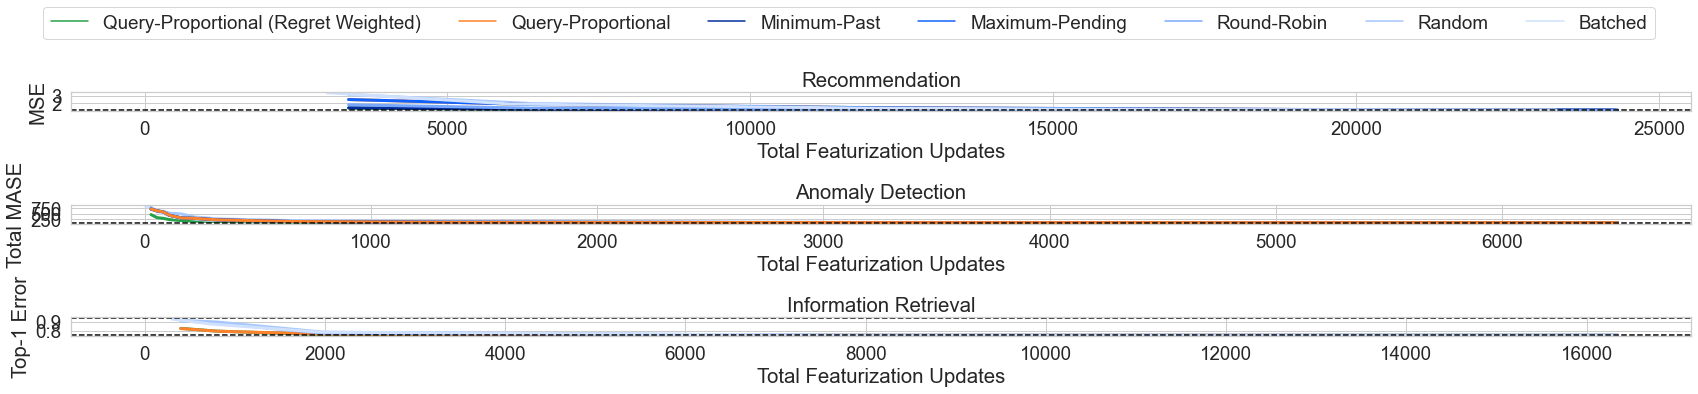

In [120]:
fig, axes = plt.subplots(3, 1, figsize=(24,5))
linewidth = 3


updates = [0.25, 0.5, 1, 2, 3, 4, 6]
g0 = sns.lineplot(data=als_df[als_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[0], palette=hue_colors, linewidth=linewidth)
axes[0].set(title="Recommendation", xlabel="Total Featurization Updates",  ylabel="MSE")
g0.axline((5000, als_upper_bound), (1, als_upper_bound), color='black', linestyle="--")
#g0.axline((5000, als_lower_bound), (1, als_lower_bound), color='black', linestyle="--")
g0.legend_.remove()

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48, 120, 240]
g1 = sns.lineplot(data=stl_df[stl_df.updates.isin(updates)].reset_index(), x="total_updates", y="error", hue="policy", ax=axes[1], palette=hue_colors, linewidth=linewidth)
axes[1].set(title="Anomaly Detection", xlabel="Total Featurization Updates",  ylabel="Total MASE")
g1.axline((0, stl_upper_bound), (0.1, stl_upper_bound), color='black', linestyle="--")
g1.axline((0, stl_lower_bound), (0.1, stl_lower_bound), color='black', linestyle="--")
#g1.axvline(stl_lower_bound_updates, linewidth=2, color='black', linestyle="--")
g1.legend_.remove()

updates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.2, 0.4, 0.5, 0.75]
g2 = sns.lineplot(data=wiki_df[wiki_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[2], palette=hue_colors, linewidth=linewidth, hue_order=hue_order)
axes[2].set(title="Information Retrieval", xlabel="Total Featurization Updates",  ylabel="Top-1 Error")
g2.axline((0, wiki_upper_bound), (0.1, wiki_upper_bound), color='black', linestyle="--")
g2.axline((0, wiki_lower_bound), (0.1, wiki_lower_bound), color='black', linestyle="--")
g2.legend_.remove()

handles, labels = axes[2].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
fig.tight_layout()

fig.savefig('../data/plots/line_all.pdf', dpi=300, bbox_inches = "tight")

    Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  runtime  \
0              0             0           0      0.5   
1              1             0           0      0.5   
2              2             0           0      0.5   
3              3             0           0      0.5   
4              4             0           0      0.2   
..           ...           ...         ...      ...   
24            24             0           0      4.0   
28            28             0           0      6.0   
32            32             0           0      8.0   
36            36             0           0     12.0   
40            40             0           0     24.0   

                                  policy  total_error  average_staleness  \
0                            Round-Robin   112.843540          16.940459   
1   Query-Proportional (Regret Weighted)   103.929800          23.991072   
2                                Batched   120.297111          17.361963   
3                                 R

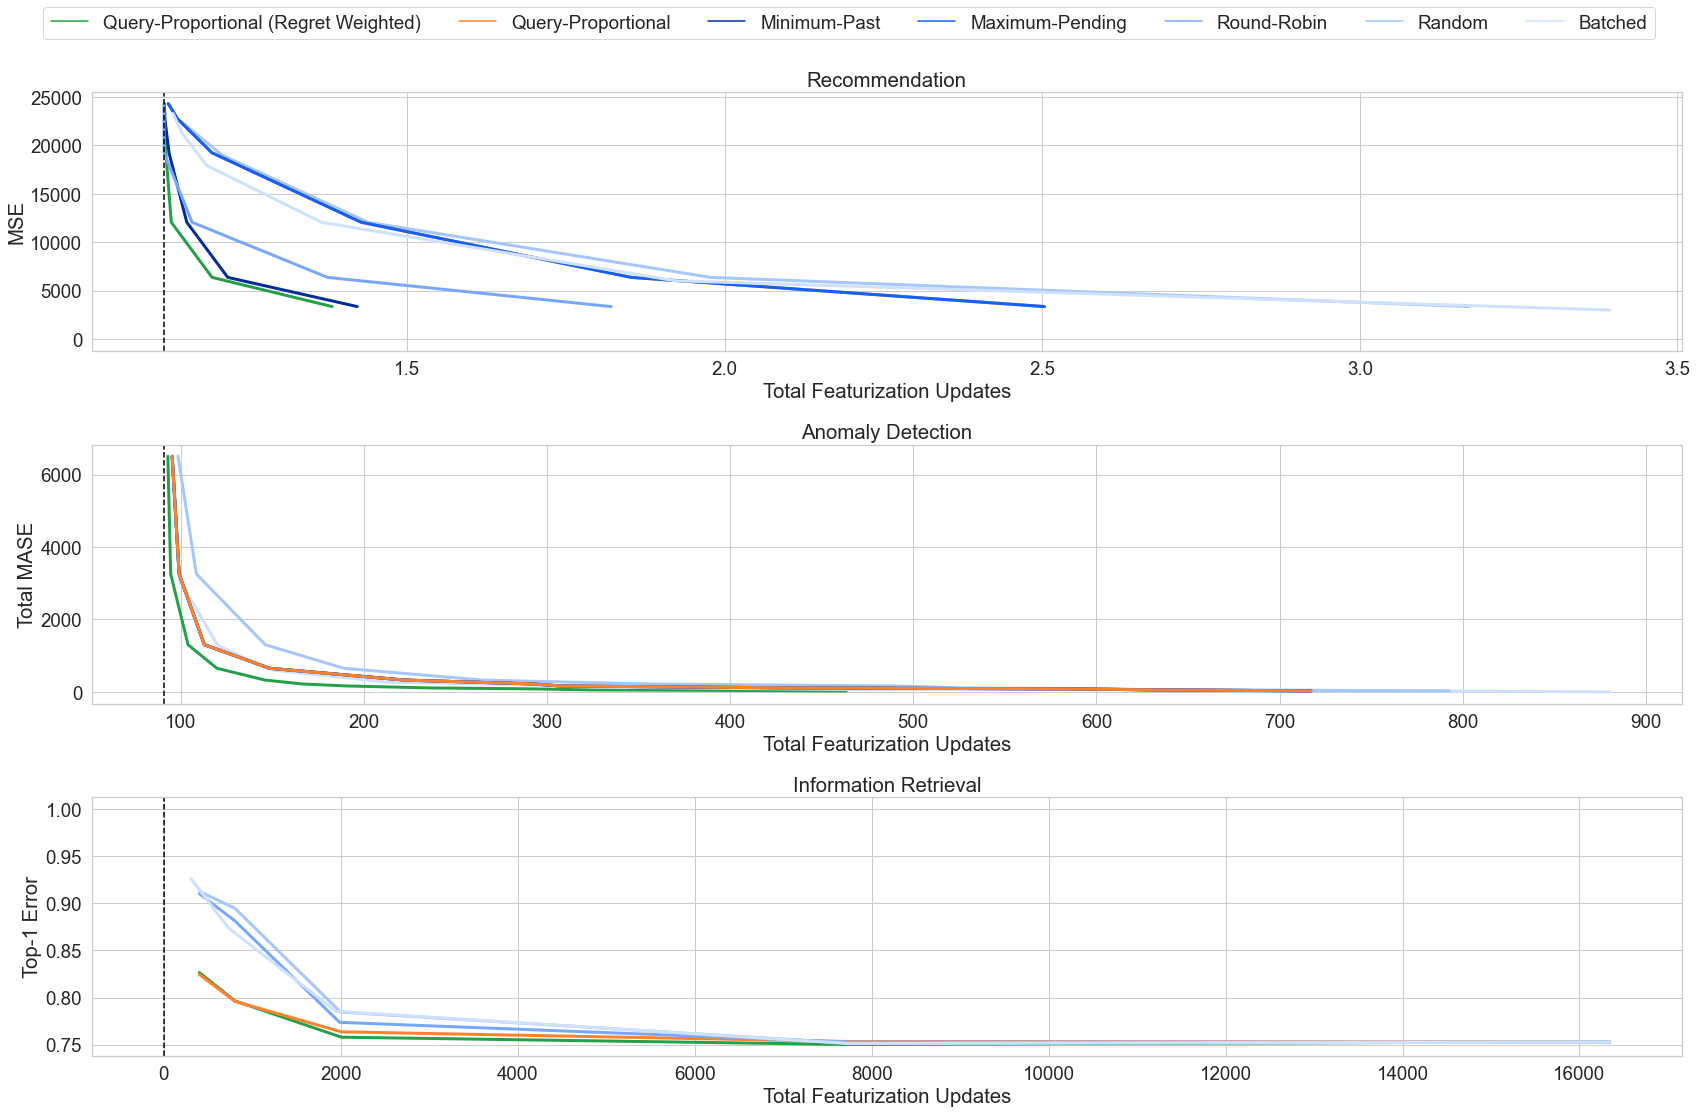

In [122]:
fig, axes = plt.subplots(3, 1, figsize=(24,15))
linewidth = 3


updates = [0.25, 0.5, 1, 2, 3, 4, 6]
g0 = sns.lineplot(data=als_df[als_df.updates.isin(updates)], x="error", y="total_updates", hue="policy", ax=axes[0], palette=hue_colors, linewidth=linewidth)
axes[0].set(title="Recommendation", xlabel="Total Featurization Updates",  ylabel="MSE")
g0.axline((als_upper_bound, 0), (als_upper_bound, 1), color='black', linestyle="--")
#g0.axline((100, als_upper_bound), (200, als_upper_bound), color='black', linestyle="--")
#g0.axline((5000, als_lower_bound), (1, als_lower_bound), color='black', linestyle="--")
g0.legend_.remove()

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48, 120, 240]
print(stl_df[stl_df.updates.isin(updates)])
g1 = sns.lineplot(data=stl_df[stl_df.updates.isin(updates)].reset_index(), x="error", y="total_updates", hue="policy", ax=axes[1], palette=hue_colors, linewidth=linewidth)
axes[1].set(title="Anomaly Detection", xlabel="Total Featurization Updates",  ylabel="Total MASE")
g1.axline((stl_upper_bound, 0), (stl_upper_bound, 1), color='black', linestyle="--")
#g1.axline((100, stl_upper_bound), (200, stl_upper_bound), color='black', linestyle="--")
#g1.axline((0, stl_lower_bound), (0.1, stl_lower_bound), color='black', linestyle="--")
g1.legend_.remove()

updates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.2, 0.4, 0.5, 0.75]
g2 = sns.lineplot(data=wiki_df[wiki_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[2], palette=hue_colors, linewidth=linewidth, hue_order=hue_order)
axes[2].set(title="Information Retrieval", xlabel="Total Featurization Updates",  ylabel="Top-1 Error")
g2.axline((wiki_upper_bound, 0.99), (wiki_upper_bound, 1), color='black', linestyle="--")
#g2.axline((100, wiki_upper_bound), (200, wiki_upper_bound), color='black', linestyle="--")
#g2.axline((0, wiki_lower_bound), (0.1, wiki_lower_bound), color='black', linestyle="--")
g2.legend_.remove()

handles, labels = axes[2].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
fig.tight_layout()

fig.savefig('../data/plots/line_all.pdf', dpi=300, bbox_inches = "tight")

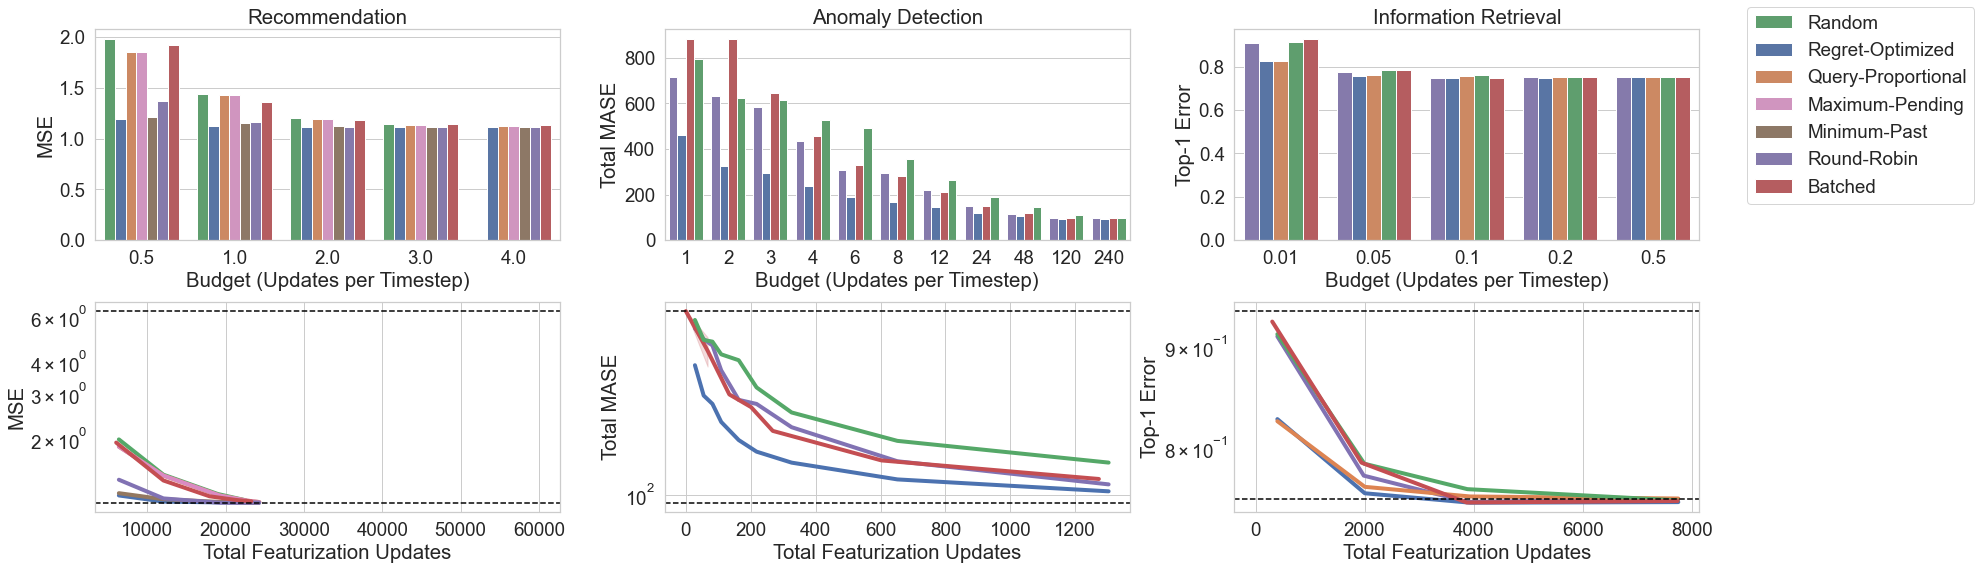

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(24,8))

updates = [0.5, 1, 2, 3, 4, 6]
g0 = sns.barplot(data=als_df[als_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[0][0], palette=hue_colors)
axes[0][0].set(title="Recommendation", xlabel="Budget (Updates per Timestep)",  ylabel="MSE")
g0.legend_.remove()

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48, 120, 240]
g1 = sns.barplot(data=stl_df[stl_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[0][1], palette=hue_colors)
axes[0][1].set(title="Anomaly Detection", xlabel="Budget (Updates per Timestep)",  ylabel="Total MASE")
g1.legend_.remove()

updates = [0.01, 0.05, 0.1, 0.2, 0.5, 1]
g2 = sns.barplot(data=wiki_df[wiki_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[0][2], palette=hue_colors)
axes[0][2].set(title="Information Retrieval", xlabel="Budget (Updates per Timestep)",  ylabel="Top-1 Error")
g2.legend_.remove()


updates = [0.5, 1, 2, 3, 4, 6]
g0 = sns.lineplot(data=als_df[als_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[1][0], palette=hue_colors, linewidth=linewidth)
axes[1][0].set(title="", xlabel="Total Featurization Updates",  ylabel="MSE", yscale="log")
g0.axline((50000, als_upper_bound), (60000, als_upper_bound), color='black', linestyle="--")
g0.axline((50000, als_lower_bound), (60000, als_lower_bound), color='black', linestyle="--")
g0.legend_.remove()

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48]
g1 = sns.lineplot(data=stl_df[stl_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[1][1], palette=hue_colors, linewidth=linewidth)
axes[1][1].set(title="", xlabel="Total Featurization Updates",  ylabel="Total MASE", yscale="log")
g1.axline((0, stl_upper_bound), (0.1, stl_upper_bound), color='black', linestyle="--")
g1.axline((0, stl_lower_bound), (0.1, stl_lower_bound), color='black', linestyle="--")
#g1.axvline(stl_lower_bound_updates, linewidth=2, color='black', linestyle="--")
g1.legend_.remove()

updates = [0.01, 0.05, 0.1, 0.2]
g2 = sns.lineplot(data=wiki_df[wiki_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[1][2], palette=hue_colors, linewidth=linewidth)
axes[1][2].set(title="", xlabel="Total Featurization Updates",  ylabel="Top-1 Error", yscale="log")
g2.axline((0, wiki_upper_bound), (0.1, wiki_upper_bound), color='black', linestyle="--")
g2.axline((0, wiki_lower_bound), (0.1, wiki_lower_bound), color='black', linestyle="--")
g2.legend_.remove()

handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.15, 1))
#fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.1))
fig.tight_layout()

fig.savefig('../data/plots/results_all.pdf')

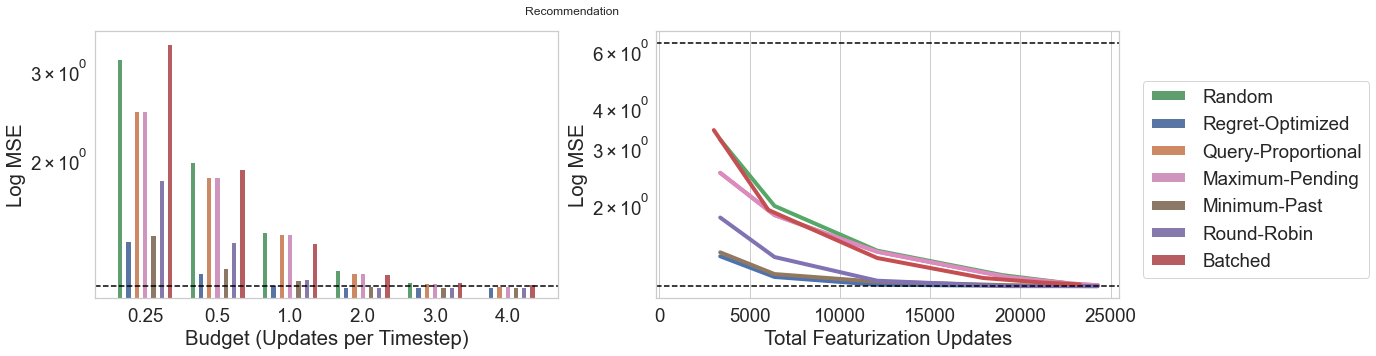

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Recommendation')


updates = [0.25, 0.5, 1, 2, 3, 4, 6]
g0 = sns.barplot(data=als_df[als_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[0], palette=hue_colors, linewidth=linewidth)
axes[0].set(title="", xlabel="Budget (Updates per Timestep)",  ylabel="Log MSE", yscale="log")
g0.axline((0.5, als_upper_bound), (1, als_upper_bound), color='black', linestyle="--")
g0.legend_.remove()

g1 = sns.lineplot(data=als_df[als_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[1], palette=hue_colors, linewidth=linewidth)
axes[1].set(title="", xlabel="Total Featurization Updates",  ylabel="Log MSE", yscale="log")
g1.axline((1000, als_upper_bound), (2000, als_upper_bound), color='black', linestyle="--")
g1.axline((1000, als_lower_bound), (2000, als_lower_bound), color='black', linestyle="--")
g1.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
fig.tight_layout()


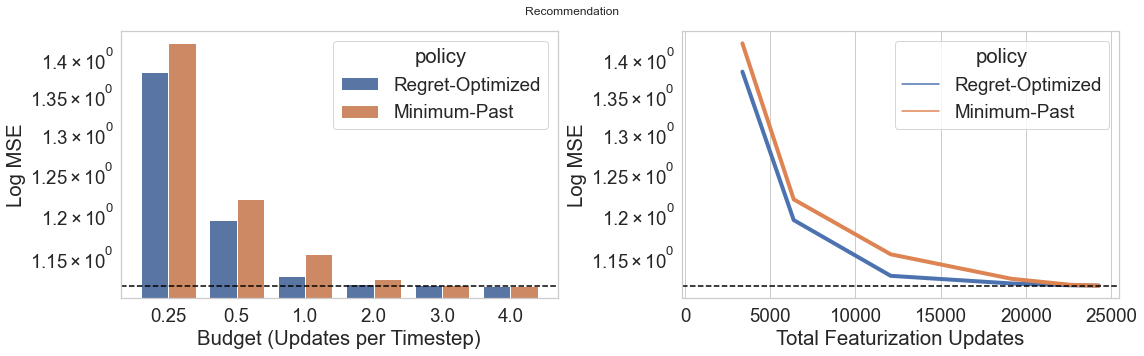

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Recommendation')


updates = [0.25, 0.5, 1, 2, 3, 4, 6]
g0 = sns.barplot(data=als_df[(als_df.updates.isin(updates)) & (als_df.policy.isin(["Regret-Optimized", "Minimum-Past"]))], x="updates", y="error", hue="policy", ax=axes[0])
axes[0].set(title="", xlabel="Budget (Updates per Timestep)",  ylabel="Log MSE", yscale="log")
g0.axline((0, als_upper_bound), (1, als_upper_bound), color='black', linestyle="--")
#g0.legend_.remove()

g1 = sns.lineplot(data=als_df[(als_df.updates.isin(updates)) & (als_df.policy.isin(["Regret-Optimized", "Minimum-Past"]))], x="total_updates", y="error", hue="policy", ax=axes[1], linewidth=linewidth)
axes[1].set(title="", xlabel="Total Featurization Updates",  ylabel="Log MSE", yscale="log")
g1.axline((1000, als_upper_bound), (2000, als_upper_bound), color='black', linestyle="--")
#g1.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1, 0.8))
fig.tight_layout()

fig.savefig('../data/plots/recommendation_best_baseline.pdf')

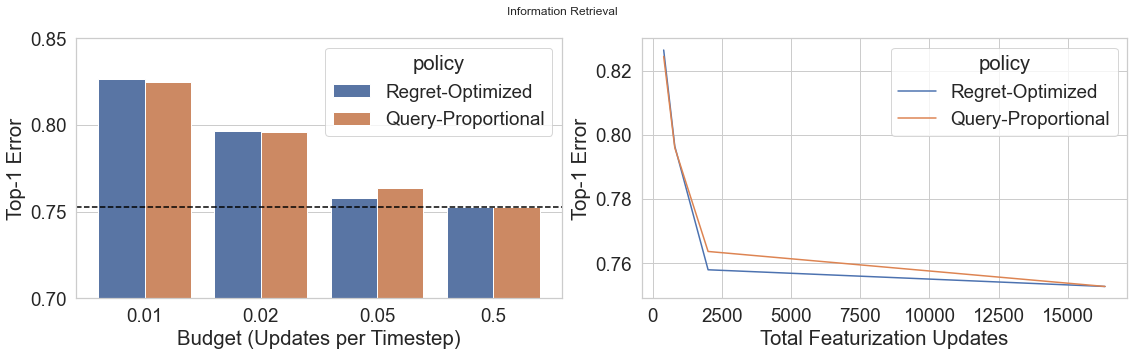

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Information Retrieval')


#updates = [0.01, 0.05, 0.1, 0.2, 0.5, 1]
#updates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.2, 0.4, 0.5, 0.75]
updates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.5, 1]
g0 = sns.barplot(data=wiki_df[(wiki_df.updates.isin(updates)) & (wiki_df.policy.isin(["Regret-Optimized", "Query-Proportional"]))], x="updates", y="error", hue="policy", ax=axes[0])
axes[0].set(title="", xlabel="Budget (Updates per Timestep)",  ylabel="Top-1 Error", ylim=(0.7, 0.85))
g0.axline((0, wiki_upper_bound), (1, wiki_upper_bound), color='black', linestyle="--")
#g0.legend_.remove()

g1 = sns.lineplot(data=wiki_df[(wiki_df.updates.isin(updates)) & (wiki_df.policy.isin(["Regret-Optimized", "Query-Proportional"]))], x="total_updates", y="error", hue="policy", ax=axes[1])
axes[1].set(title="", xlabel="Total Featurization Updates",  ylabel="Top-1 Error")
#g1.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels)
fig.tight_layout()

fig.savefig('../data/plots/ir_best_baseline.pdf')

ValueError: min() arg is an empty sequence

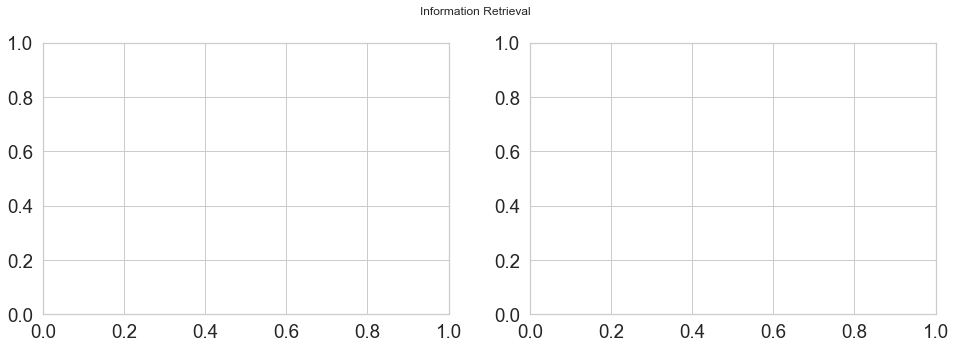

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Information Retrieval')


updates = [1, 4, 5, 120, 240]
g0 = sns.barplot(data=stl_df[(stl_df.updates.isin(updates)) & (stl_df.policy.isin(["Regret Optimized", "Query Proportional"]))], x="updates", y="error", hue="policy", ax=axes[0])
axes[0].set(title="", xlabel="Budget (Updates per Timestep)",  ylabel="Log MSE", yscale="log")
g0.legend_.remove()

g1 = sns.lineplot(data=wiki_df[(wiki_df.updates.isin(updates)) & (wiki_df.policy.isin(["Regret Optimized", "Query Proportional"]))], x="total_updates", y="error", hue="policy", ax=axes[1])
axes[1].set(title="", xlabel="Total Featurization Updates",  ylabel="Log MSE", yscale="log")
g1.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
fig.tight_layout()

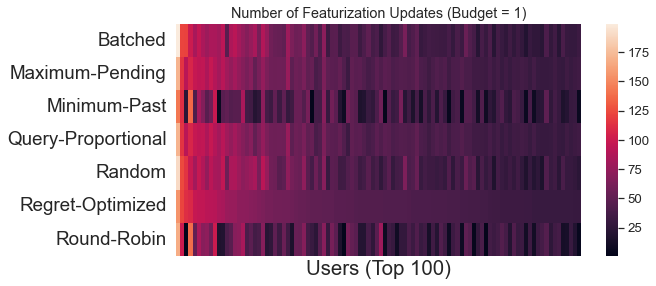

In [38]:
updates = 1
hist_df = als_updates_df[ als_updates_df["updates"] == updates].groupby(by=["key", "policy"]).updates.count().apply(lambda x: x/1).reset_index()
hist_df["user_id"] = hist_df["key"]
hist_df["policy"] = hist_df.policy.map(policy_map)
hist_df = hist_df.dropna()
heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Regret-Optimized", axis=1, ascending=False).fillna(0)
f, ax = plt.subplots(figsize=(8, 4))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.2)

g = sns.heatmap(
    heat_df.iloc[:, :100], 
    annot=False, 
    cbar=True,  
    #yticklabels=["Regret Optimized", "Maximum Pending", "Minimum Past", "Round Robin"],
    #xticklabels=range(1, 100, 1),
    square=False,
    ax=ax
)
g.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax.set_xlabel(f"Users (Top 100)")
ax.set_ylabel(None)
ax.set_title(f"Number of Featurization Updates (Budget = {updates})")
#plt.legend(fontsize='x-large')
f.savefig('../data/plots/als_heatmap.pdf', dpi=300, bbox_inches = "tight")

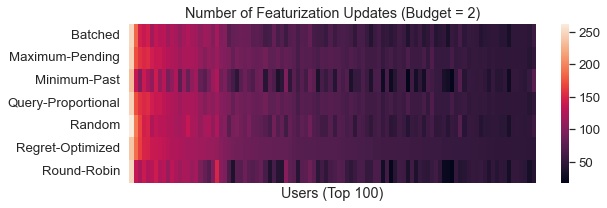

In [39]:
updates = 2
hist_df = als_updates_df[ als_updates_df["updates"] == updates].groupby(by=["key", "policy"]).updates.count().apply(lambda x: x/1).reset_index()
hist_df["user_id"] = hist_df["key"]
hist_df["policy"] = hist_df.policy.map(policy_map)
hist_df = hist_df.dropna()
heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Regret-Optimized", axis=1, ascending=False).fillna(0)
f, ax = plt.subplots(figsize=(8, 3))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.2)

g = sns.heatmap(
    heat_df.iloc[:, :100], 
    annot=False, 
    cbar=True,  
    #yticklabels=["Regret Optimized", "Maximum Pending", "Minimum Past", "Round Robin"],
    #xticklabels=range(1, 100, 1),
    square=False,
    ax=ax
)
g.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax.set_xlabel(f"Users (Top 100)")
ax.set_ylabel(None)
ax.set_title(f"Number of Featurization Updates (Budget = {updates})")
#plt.legend(fontsize='x-large')
f.savefig('../data/plots/als_heatmap.pdf', dpi=300, bbox_inches = "tight")

      key            policy  updates  user_id
0     1.0           Batched        4        1
1     1.0            Random        7        1
2     1.0  Regret-Optimized        3        1
3     1.0       Round-Robin        5        1
4     2.0           Batched        4        2
..    ...               ...      ...      ...
263  66.0       Round-Robin        4       66
264  67.0           Batched        4       67
265  67.0            Random        7       67
266  67.0  Regret-Optimized        4       67
267  67.0       Round-Robin        4       67

[268 rows x 4 columns]


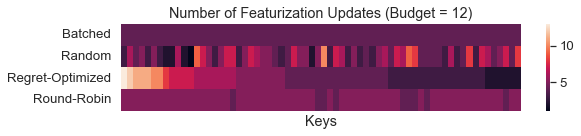

In [40]:
updates = 12
hist_df = stl_updates_df[stl_updates_df["updates"] == updates].groupby(by=["key", "policy"]).updates.count().reset_index()
hist_df["user_id"] = hist_df["key"].astype(int)
hist_df = hist_df.dropna()
print(hist_df)
heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Regret-Optimized", axis=1, ascending=False).fillna(0)
f, ax = plt.subplots(figsize=(8, 2))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.2)

g = sns.heatmap(
    heat_df.iloc[:, :66], 
    annot=False, 
    cbar=True,  
    #yticklabels=["Regret Optimized", "Maximum Pending", "Minimum Past", "Round Robin"],
    #xticklabels=range(1, 100, 1),
    square=False,
    ax=ax
)
g.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.set_xlabel(f"Keys")
ax.set_ylabel(None)
ax.set_title(f"Number of Featurization Updates (Budget = {updates})")
#plt.legend(fontsize='x-large')
f.savefig('../data/plots/stl_heatmap.pdf', dpi=300, bbox_inches = "tight")

In [ ]:
stl_updates_df[stl_updates_df["updates"] == 2.0]